(lecture04:homework)=
# Homework 4

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ This is due before the beginning of the next lecture.
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**

Let me set you up with some nice code for plotting and downloading files.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

import requests
import os

def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Problem 1 - Visual analysis of a variable-speed compressor experiment

In this problem we are going to need [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google drive or just download it with the code segment below:

In [2]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx'
download(url)

import pandas as pd
data = pd.read_excel('compressor_data.xlsx')
data

,T_e,DT_sh,T_c,DT_sc,T_amb,f,m_dot,m_dot.1,Capacity,Power,Current,COP,Efficiency
0,-30,11,25,8,35,60,28.8,8.000000,1557,901,4.4,1.73,0.467
1,-30,11,30,8,35,60,23.0,6.388889,1201,881,4.0,1.36,0.425
2,-30,11,35,8,35,60,17.9,4.972222,892,858,3.7,1.04,0.382
3,-25,11,25,8,35,60,46.4,12.888889,2509,1125,5.3,2.23,0.548
4,-25,11,30,8,35,60,40.2,11.166667,2098,1122,5.1,1.87,0.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,10,11,45,8,35,60,245.2,68.111111,12057,2525,11.3,4.78,0.722
61,10,11,50,8,35,60,234.1,65.027778,10939,2740,12.3,3.99,0.719
62,10,11,55,8,35,60,222.2,61.722222,9819,2929,13.1,3.35,0.709
63,10,11,60,8,35,60,209.3,58.138889,8697,3091,13.7,2.81,0.693


The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in degrees C) and they measured various other quantities.
Our goal is to understand the experimental design and develop some understanding of the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
Answer the following questions.

+ Do the scatter plot of $T_e$ and $T_c$. This will reveal the experimental design picked by the experimentalists. Make sure you label the axes correctly. Hint: These are columns `T_e` and `T_c` of the data frame `data`. 

In [ ]:
# your code here

+ Is there a gap in the experimental design? If yes, why do you think they have a gap?

*Your explanation here.*

+ Do the scatter plot between `T_e` and `Capacity`.

In [ ]:
# your code here

+ Do the scatter plot between `T_c` and `Capacity`.

In [ ]:
# your code here

+ Do the scatter plot between `T_e` and `Power`.

In [ ]:
# your code here

+ Do the scatter plot between `T_c` and `Power`.

In [ ]:
# your code here

+ We are lucky that we only have two experimental control variables because can do a bit more thing with scatter. You can color each point in the scatter plot according to a scale that follows an output variable. Let me show you what I mean by doing the plot for the `Capacity`.

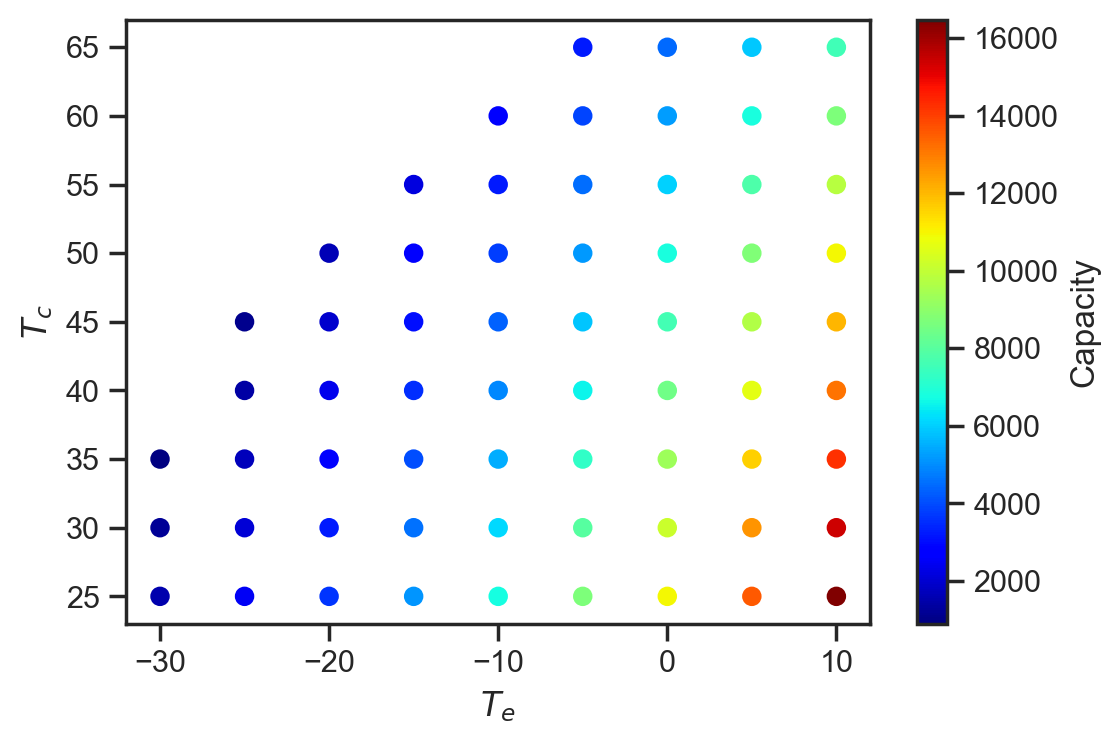

In [3]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(data['T_e'], data['T_c'], # So far a standard scatter plot
                c=data['Capacity'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Capacity')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

Now repeat the same thing for the `Power`:

In [ ]:
# your code here

## Problem 2 - Visual analysis of an airfoil experiment

In this problem, you are going to repeat what you did in Problem 1, but without my guidance!

The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)
From this reference, the descreption of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
> 
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. Angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level, in decibels.

Before we start, let's download and load the data.
I am going to put them in a dataframe for you.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
download(url)
raw_data = np.loadtxt('airfoil_self_noise.dat')
df = pd.DataFrame(raw_data, columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                                 'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

+ Do the histogtrams of all variables. Use as many code segments you need below to plot the histogram of each variable in a different plot. Make sure you label the axes correctly.

In [ ]:
# your code here (as many blocks as you like)

+ Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions. Are there any holes in the experimental dataset, i.e., places where you have no data?

In [ ]:
# your code here (as many blocks as you like)

*Your explanation here*

+  Do the scatter plot between each input variable and the output. This will give you an idea of the relationship between each input and the output. Do you observe any obvious patterns?

In [ ]:
# your code here (as many blocks as you like)

*Your explanation here*

+ Now pick the two input variables you think are the most important and do the scatter plot between them using the output to color the points (see the last question of Problem 1). Feel free to repeat it with more than two pairs of inputs if you want. Briefly discuss your findings.

In [ ]:
# your code here (as many blocks as you like)

*Your explanation here*